In [32]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## Inspect data

In [33]:
test = pd.read_csv('/Users/reggieyang/Dropbox/Semester C/Take Home Challenges/Project Challenges/2. Spanish Translation A:B Test/Translation_Test/test_table.csv',date_parser='date')
user = pd.read_csv('/Users/reggieyang/Dropbox/Semester C/Take Home Challenges/Project Challenges/2. Spanish Translation A:B Test/Translation_Test/user_table.csv')


In [34]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [35]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [36]:
#check whether every row from user_id in user is unique
len(user)==len(user['user_id'].value_counts())

True

In [37]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [38]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [39]:
user.isnull().sum()

user_id    0
sex        0
age        0
country    0
dtype: int64

In [40]:
test.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
dtype: int64

## Merge data

In [41]:
data = pd.merge(test, user, on='user_id',how='left')
data.shape

(453321, 12)

In [193]:
data

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0,M,22.0,Spain
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico


In [43]:
data.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [115]:
#overview the data
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


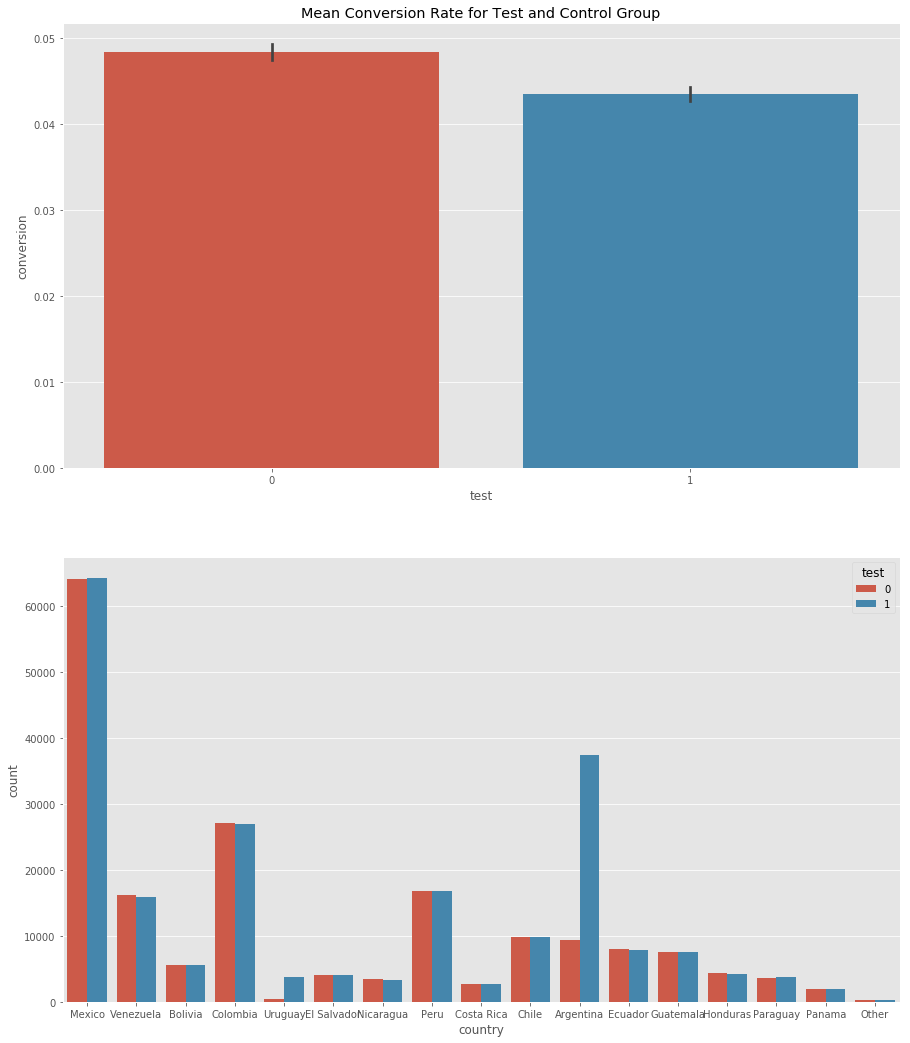

In [197]:
data_ns = data[(data['country']!='Spain')]
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(15,18))
sns.barplot(x='test',y='conversion', data=data_ns, ax=ax[0])
ax[0].set_title('Mean Conversion Rate for Test and Control Group')
sns.countplot(x='country',hue='test', data=data_ns, ax=ax[1])

It seems that conversion rate in test group is less than control group

## T-Test

In [ ]:
data_nospain = data[data['country']!='Spain']
data_nospain_test = data_nospain[data_nospain['test']==1]['conversion']
data_nospain_control = data_nospain[data_nospain['test']==0]['conversion']

In [ ]:
#test whether two datasets have similar variance
from scipy import stats
stats.levene(data_nospain_control, data_nospain_test)

In [ ]:
from scipy import stats
stats.ttest_ind(data_nospain_control,data_nospain_test, equal_var = False)

In [73]:
#group by country
data_nospain_1 = data_nospain[['country','conversion','test','browser']]


In [74]:
for n in data_nospain_1['country'].unique():
    print('country:{}'.format(n))
    print(stats.ttest_ind(data_nospain_1[(data_nospain_1['country']==n)&(data_nospain_1['test']==0)]['conversion'],data_nospain_1[(data_nospain_1['country']==n)&(data_nospain_1['test']==1)]['conversion']))
          
          

country:Mexico
Ttest_indResult(statistic=-1.3866622608887011, pvalue=0.1655471793333996)
country:Venezuela
Ttest_indResult(statistic=0.562558452145742, pvalue=0.5737395248962414)
country:Bolivia
Ttest_indResult(statistic=0.35996930325868887, pvalue=0.7188769243244486)
country:Colombia
Ttest_indResult(statistic=0.7999677645152214, pvalue=0.42373298936771575)
country:Uruguay
Ttest_indResult(statistic=-0.14741402589354316, pvalue=0.8828124276242947)
country:El Salvador
Ttest_indResult(statistic=1.1546911588302902, pvalue=0.24825068097389943)
country:Nicaragua
Ttest_indResult(statistic=-0.2788729886854466, pvalue=0.7803508783178821)
country:Peru
Ttest_indResult(statistic=-0.28982761667685353, pvalue=0.771949904176449)
country:Costa Rica
Ttest_indResult(statistic=-0.40177890057855575, pvalue=0.6878629303268544)
country:Chile
Ttest_indResult(statistic=-1.0303236741009691, pvalue=0.3028707161366122)
country:Argentina
Ttest_indResult(statistic=0.9908451111684144, pvalue=0.3217663480975063)
cou

In [75]:
for n in data_nospain_1['browser'].unique():
    print('browser:{}'.format(n))
    print(stats.ttest_ind(data_nospain_1[(data_nospain_1['browser']==n)&(data_nospain_1['test']==0)]['conversion'],data_nospain_1[(data_nospain_1['browser']==n)&(data_nospain_1['test']==1)]['conversion']))
          
          

browser:IE
Ttest_indResult(statistic=2.3006106342865467, pvalue=0.021417395878981157)
browser:Android_App
Ttest_indResult(statistic=4.991310996121357, pvalue=6.004390446479836e-07)
browser:FireFox
Ttest_indResult(statistic=3.8588075295806648, pvalue=0.00011414008944876757)
browser:Chrome
Ttest_indResult(statistic=2.8729770516284745, pvalue=0.004067184629872351)
browser:Iphone_App
Ttest_indResult(statistic=1.0243944583918485, pvalue=0.3056549988943241)
browser:Safari
Ttest_indResult(statistic=2.6822717660289372, pvalue=0.007315701700477427)
browser:Opera
Ttest_indResult(statistic=0.16774312614027498, pvalue=0.8667916707619885)


T-test verifies that the mean converation rate of test and control groups are not the same.

## Verify the Effectiveness of A/B test

### 1. Chi-Square Test

In [60]:
data['country'] = data['country'].fillna('Other')

X = data.copy()
del X['date']
del X['user_id']
del X['ads_channel']
del X['sex']
from sklearn.preprocessing import LabelEncoder

# to use sklearn to check feature importance, we must convert string values to numbers

X["source"] = LabelEncoder().fit_transform(data.source)
X["device"] = LabelEncoder().fit_transform(data.device)
X["browser_language"] = LabelEncoder().fit_transform(data.browser_language)
X["browser"] = LabelEncoder().fit_transform(data.browser)
X['country'] = LabelEncoder().fit_transform(data.country)

In [61]:
from sklearn.feature_selection import chi2,f_classif
colnames = ["source","device","browser_language",'browser','country']
ch2values,pvalues = chi2(X.loc[:,colnames],X["test"])
pd.DataFrame({'chi2_value':ch2values,'pvalue':pvalues},index = colnames).sort_values(by='pvalue')

,chi2_value,pvalue
country,81984.209557,0.000000
browser,21.024043,0.000005
source,1.675437,0.195532
device,0.844110,0.358224
browser_language,0.000023,0.996160


### 2. Decision Tree

In [167]:
data2 = data.copy()
data2.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [168]:
data2["source"] = LabelEncoder().fit_transform(data2.source)
data2["device"] = LabelEncoder().fit_transform(data2.device)
data2["browser_language"] = LabelEncoder().fit_transform(data2.browser_language)
data2["browser"] = LabelEncoder().fit_transform(data2.browser)
data2['country'] = LabelEncoder().fit_transform(data2.country)
data2['ads_channel'] = data2['ads_channel'].fillna('Others')
data2['ads_channel'] = LabelEncoder().fit_transform(data2.ads_channel)

data2.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,1,1,1,4,3,1,0,M,32.0,15
1,497851,2015-12-04,0,1,1,2,3,0,1,M,21.0,9
2,848402,2015-12-04,0,1,1,1,1,0,0,M,34.0,15
3,290051,2015-12-03,0,0,2,1,0,0,1,F,22.0,9
4,548435,2015-11-30,0,1,1,2,2,0,1,M,19.0,9


In [169]:
data2.drop(['user_id','date','sex'],axis=1,inplace=True)
train = data2[data2['test']==0]
test = data2[data2['test']==1]
train.head()

,source,device,browser_language,ads_channel,browser,conversion,test,age,country
0,1,1,1,4,3,1,0,32.0,15
2,0,1,1,1,1,0,0,34.0,15
6,2,0,2,4,0,0,0,35.0,9
7,1,1,0,4,1,0,0,22.0,15
9,0,0,1,1,0,0,0,33.0,9


In [172]:
X_train = train.drop(['test','age'],axis=1)
X_test = test.drop(['test','age'],axis=1)
y_train = train['test']
y_test = test['test']

In [173]:
from sklearn.tree import DecisionTreeRegressor  
dtree = DecisionTreeRegressor()  
dtree.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

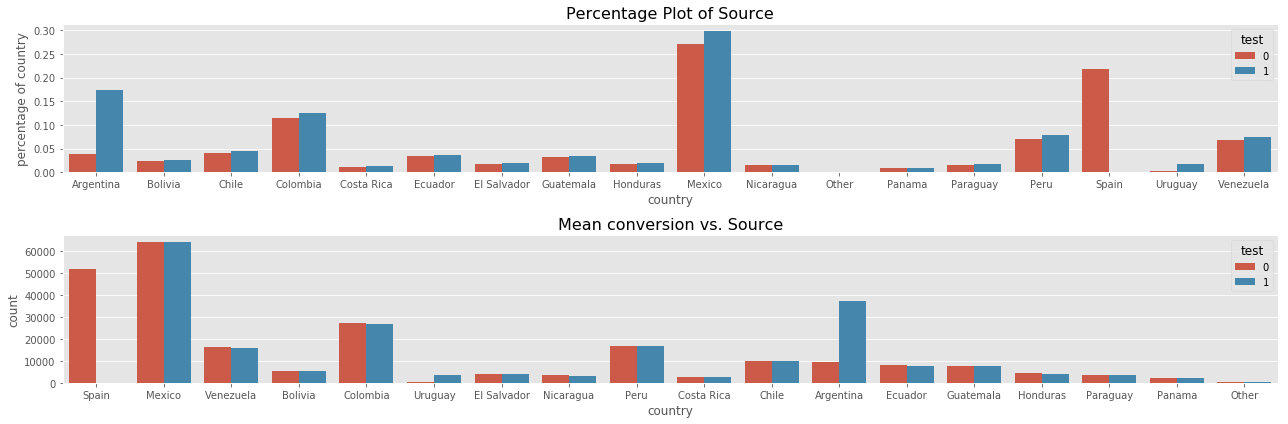

In [189]:
# Visualization of country
count = data[['country', 'test', 'conversion']].groupby(['country', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'conversion'] = count.loc[count['test'] == 1, 'conversion'] / len(data[data['test']==1])
count.loc[count['test'] == 0, 'conversion'] = count.loc[count['test'] == 0, 'conversion'] / len(data[data['test']==0])

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 6))
sns.barplot(x='country', y='conversion', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Source', fontsize=16)
ax[0].set_ylabel('percentage of country')
sns.countplot(x='country', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean conversion vs. Source', fontsize=16)
plt.tight_layout()
plt.show()

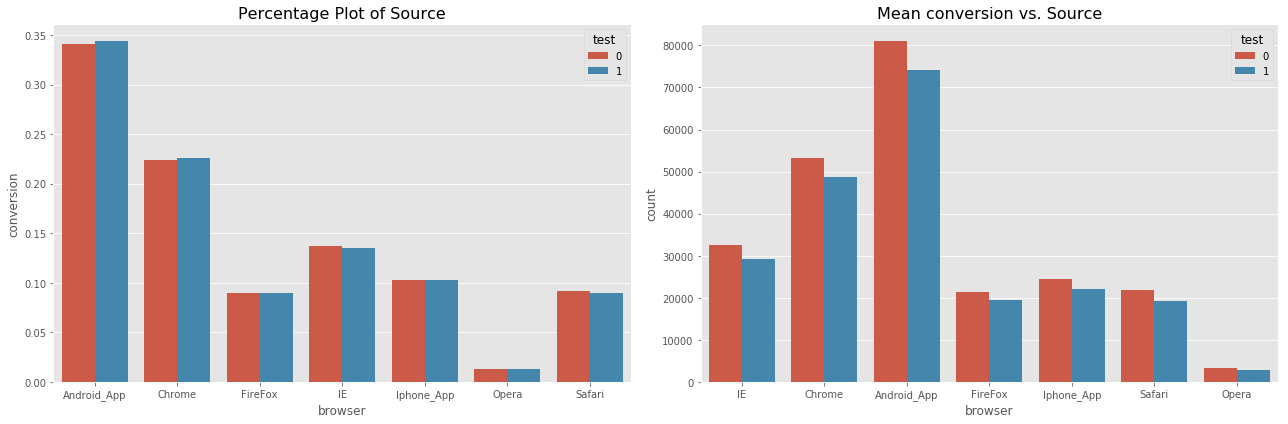

In [118]:
# Visualization of browser
count = data[['browser', 'test', 'conversion']].groupby(['browser', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'conversion'] = count.loc[count['test'] == 1, 'conversion'] / len(data[data['test']==1])
count.loc[count['test'] == 0, 'conversion'] = count.loc[count['test'] == 0, 'conversion'] / len(data[data['test']==0])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='browser', y='conversion', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Source', fontsize=16)

sns.countplot(x='browser', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean conversion vs. Source', fontsize=16)
plt.tight_layout()
plt.show()

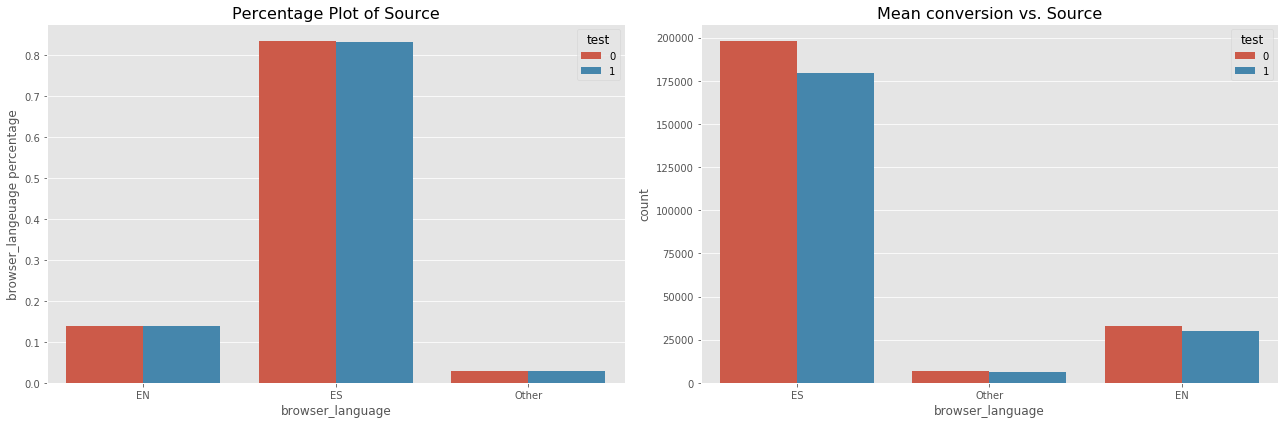

In [175]:
# Visualization of browser_language
count = data[['browser_language', 'test', 'conversion']].groupby(['browser_language', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'conversion'] = count.loc[count['test'] == 1, 'conversion'] / len(data[data['test']==1])
count.loc[count['test'] == 0, 'conversion'] = count.loc[count['test'] == 0, 'conversion'] / len(data[data['test']==0])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='browser_language', y='conversion', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Source', fontsize=16)
ax[0].set_ylabel('browser_langeuage percentage')

sns.countplot(x='browser_language', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean conversion vs. Source', fontsize=16)
plt.tight_layout()
plt.show()

In [187]:
print(len(data[(data['browser_language']=='ES')&(data['test']==1)])/len(data[data['test']==1]))
print(len(data[(data['browser_language']=='ES')&(data['test']==0)])/len(data[data['test']==0]))

0.8323525462652153
0.8332968171974147


In [190]:
print(len(data[data['test']==1]))
print(len(data[data['test']==0]))

215983
237338


In [192]:
print(len(data[(data['browser_language']=='ES')&(data['test']==1)]))
print(len(data[(data['browser_language']=='ES')&(data['test']==0)]))

179774
197773


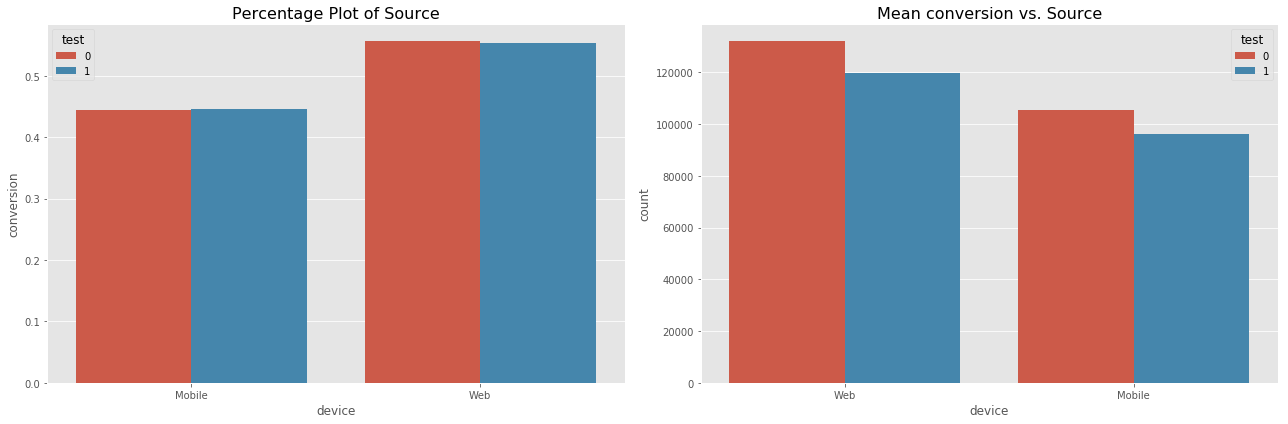

In [120]:
# Visualization of device
count = data[['device', 'test', 'conversion']].groupby(['device', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'conversion'] = count.loc[count['test'] == 1, 'conversion'] / len(data[data['test']==1])
count.loc[count['test'] == 0, 'conversion'] = count.loc[count['test'] == 0, 'conversion'] / len(data[data['test']==0])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='device', y='conversion', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Source', fontsize=16)

sns.countplot(x='device', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean conversion vs. Source', fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
#T-test function

In [23]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [25]:

alpha = 0.05
t_stat, df, cv, p = independent_ttest(data_nospain_test,data_nospain_control,alpha)
print('t={}, df={}, cv={}, p={}'.format(t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-7.3939374121344805, df=401537, cv=1.6448574218014724, p=1.4277468096679513e-13
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.
